<a href="https://colab.research.google.com/github/victorcasi/victorcasi/blob/main/sql_exercises_stanford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **StanfordOnline SOE.YDB-SQL0001**

#### **Databases: Relational Databases and SQL**


In [2]:
import pandas as pd
import numpy as np
import sqlite3 



Creating a connection

In [3]:
conn = sqlite3.connect('test.db')

In [4]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Importing data

In [5]:
path ="/content/drive/MyDrive/Dados/movies.csv"
movies = pd.read_csv(path, sep=";")
movies

,mID,title,year,director
0,101,Gone with the Wind,1939,Victor Fleming
1,102,Star Wars,1977,George Lucas
2,103,The Sound of Music,1965,Robert Wise
3,104,E.T.,1982,Steven Spielberg
4,105,Titanic,1997,James Cameron
5,106,Snow White,1937,<null>
6,107,Avatar,2009,James Cameron
7,108,Raiders of the Lost Ark,1981,Steven Spielberg


In [6]:
path ="/content/drive/MyDrive/Dados/rati.csv"
rating = pd.read_csv(path, sep=";")
rating

,rID,mID,stars,ratingDate
0,201,101,2,22/01/2011
1,201,101,4,27/01/2011
2,202,106,4,<null>
3,203,103,2,20/01/2011
4,203,108,4,12/01/2011
5,203,108,2,30/01/2011
6,204,101,3,09/01/2011
7,205,103,3,27/01/2011
8,205,104,2,22/01/2011
9,205,108,4,<null>


In [7]:
path ="/content/drive/MyDrive/Dados/revi.csv"
reviewer = pd.read_csv(path, sep=";")
reviewer

,rID,name
0,201,Sarah Martinez
1,202,Daniel Lewis
2,203,Brittany Harris
3,204,Mike Anderson
4,205,Chris Jackson
5,206,Elizabeth Thomas
6,207,James Cameron
7,208,Ashley White


In [8]:
path ="/content/drive/MyDrive/Dados/high.csv"
high = pd.read_csv(path, sep=";")
high

,ID,name,grade
0,1510,Jordan,9
1,1689,Gabriel,9
2,1381,Tiffany,9
3,1709,Cassandra,9
4,1101,Haley,10
5,1782,Andrew,10
6,1468,Kris,10
7,1641,Brittany,10
8,1247,Alexis,11
9,1316,Austin,11


In [9]:
path ="/content/drive/MyDrive/Dados/friend.csv"
friend = pd.read_csv(path, sep=";")
friend

,ID1,ID2
0,1510,1381
1,1510,1689
2,1689,1709
3,1381,1247
4,1709,1247
5,1689,1782
6,1782,1468
7,1782,1316
8,1782,1304
9,1468,1101


In [10]:
path ="/content/drive/MyDrive/Dados/likes.csv"
likes = pd.read_csv(path, sep=";")
likes

,ID1,ID2
0,1689,1709
1,1709,1689
2,1782,1709
3,1911,1247
4,1247,1468
5,1641,1468
6,1316,1304
7,1501,1934
8,1934,1501
9,1025,1101


Connecting the data into SQL

In [11]:
movies.to_sql('movies', conn, if_exists='replace',index=False)
rating.to_sql('rating', conn, if_exists='replace',index=False)
reviewer.to_sql('reviewer', conn, if_exists='replace',index=False)
high.to_sql('high', conn, if_exists='replace',index=False)
friend.to_sql('friend', conn, if_exists='replace',index=False)
likes.to_sql('likes', conn, if_exists='replace',index=False)

In [12]:
high

,ID,name,grade
0,1510,Jordan,9
1,1689,Gabriel,9
2,1381,Tiffany,9
3,1709,Cassandra,9
4,1101,Haley,10
5,1782,Andrew,10
6,1468,Kris,10
7,1641,Brittany,10
8,1247,Alexis,11
9,1316,Austin,11




```
```
# **# SQL Movie-Rating Query Exercises**
### EXERCISES:

1.Find the titles of all movies directed by Steven Spielberg

In [ ]:
sql1 = '''select title
          from movies
          where director = "Steven Spielberg"'''
pd.read_sql(sql1,conn)

,title
0,E.T.
1,Raiders of the Lost Ark


2.Find all years that have a movie that received a rating of 4 or 5, and sort them in increasing order.



In [ ]:
sql2 = '''select distinct year 
         from movies join rating
         on movies.mID = rating.MID
         where rating.stars = 4 or rating.stars = 5
         order by year'''
pd.read_sql(sql2,conn)

,year
0,1937
1,1939
2,1981
3,2009


3.Find the titles of all movies that have no ratings.

In [ ]:
#The LEFT JOIN keyword returns all records from the left table (table1),
#and the matching records from the right table (table2). The result is 0 records from the right side, if there is no match.

sql3 = '''select title
         from movies left join rating
         on movies.mID = rating.MID
         where rating.stars is null
          '''
pd.read_sql(sql3,conn)

,title
0,Star Wars
1,Titanic


4.Some reviewers didn't provide a date with their rating. Find the names of all reviewers who have ratings with a NULL value for the date.



In [ ]:
sql4 = '''select name 
          from reviewer join rating
          on reviewer.rID = rating.rID
          where rating.ratingDate is NULL;
          '''
pd.read_sql(sql4,conn)

,name


5.Write a query to return the ratings data in a more readable format: reviewer name, movie title, stars, and ratingDate. Also, sort the data, first by reviewer name, then by movie title, and lastly by number of stars.

In [ ]:
sql5 = '''select  name, title, stars, ratingDate
        from (select name, stars, ratingDate, mID  from reviewer join rating
        on reviewer.rID = rating.rID) T join movies
        on T.mID = movies.mID
        order by name, title,stars;
          '''
pd.read_sql(sql5,conn)

,name,title,stars,ratingDate
0,Ashley White,E.T.,3,02/01/2011
1,Brittany Harris,Raiders of the Lost Ark,2,30/01/2011
2,Brittany Harris,Raiders of the Lost Ark,4,12/01/2011
3,Brittany Harris,The Sound of Music,2,20/01/2011
4,Chris Jackson,E.T.,2,22/01/2011
5,Chris Jackson,Raiders of the Lost Ark,4,<null>
6,Chris Jackson,The Sound of Music,3,27/01/2011
7,Daniel Lewis,Snow White,4,<null>
8,Elizabeth Thomas,Avatar,3,15/01/2011
9,Elizabeth Thomas,Snow White,5,19/01/2011


In [ ]:
sql5 = '''select  name, title, stars, ratingDate
        from reviewer R1
        join rating on R1.rID = rating.rID
        join movies on rating.mID = movies.mID
        order by name, title,stars;
          '''
pd.read_sql(sql5,conn)

,name,title,stars,ratingDate
0,Ashley White,E.T.,3,02/01/2011
1,Brittany Harris,Raiders of the Lost Ark,2,30/01/2011
2,Brittany Harris,Raiders of the Lost Ark,4,12/01/2011
3,Brittany Harris,The Sound of Music,2,20/01/2011
4,Chris Jackson,E.T.,2,22/01/2011
5,Chris Jackson,Raiders of the Lost Ark,4,<null>
6,Chris Jackson,The Sound of Music,3,27/01/2011
7,Daniel Lewis,Snow White,4,<null>
8,Elizabeth Thomas,Avatar,3,15/01/2011
9,Elizabeth Thomas,Snow White,5,19/01/2011


6.For all cases where the same reviewer rated the same movie twice and gave it a higher rating the second time, return the reviewer's name and the title of the movie.

In [ ]:
sql6 = ''' select *, count (name) as count
           from
                 (select  name, title, ratingDate, stars
                 from (select *  from reviewer
                 left join rating
                 on reviewer.rID = rating.rID) T join movies
                 on T.mID = movies.mID)
         group by name, title
         having count = 2
        ;
          '''
pd.read_sql(sql6,conn)

,name,title,ratingDate,stars,count
0,Brittany Harris,Raiders of the Lost Ark,12/01/2011,4,2
1,Sarah Martinez,Gone with the Wind,27/01/2011,4,2


7.For each movie that has at least one rating, find the highest number of stars that movie received. Return the movie title and number of stars. Sort by movie title.



In [ ]:
#The INNER JOIN keyword selects records that have matching values in both tables

sql7 = '''select title, MAX(stars)
        from movies
        inner join rating
        on movies.mID = rating.mID
        group by title
        order by title
          '''
pd.read_sql(sql7,conn)

,title,MAX(stars)
0,Avatar,5
1,E.T.,3
2,Gone with the Wind,4
3,Raiders of the Lost Ark,4
4,Snow White,5
5,The Sound of Music,3


8.For each movie, return the title and the 'rating spread', that is, the difference between highest and lowest ratings given to that movie. Sort by rating spread from highest to lowest, then by movie title.

In [ ]:
sql8 = '''select title, (MAX(stars)-MIN(stars)) as spread
        from movies
        inner join rating
        on movies.mID = rating.mID
        group by title
        order by spread desc
                  '''
pd.read_sql(sql8,conn)

,title,spread
0,Avatar,2
1,Gone with the Wind,2
2,Raiders of the Lost Ark,2
3,E.T.,1
4,Snow White,1
5,The Sound of Music,1


9.Find the difference between the average rating of movies released before 1980 and the average rating of movies released after 1980. (Make sure to calculate the average rating for each movie, then the average of those averages for movies before 1980 and movies after. Don't just calculate the overall average rating before and after 1980.)



In [ ]:
sql9 = '''select (avg(avg1)- avg(avg2)) as diference
          from(

          select avg(stars) as avg1
          from movies
          inner join rating
          on movies.mID = rating.mID
          where year < 1980
          group by title)   as before1980, 

          (select avg(stars) as avg2
          from movies
          inner join rating
          on movies.mID = rating.mID
          where year > 1980 
          group by title)   as after1980         
                  '''
pd.read_sql(sql9,conn)

,diference
0,0.055556


10.Find the names of all reviewers who rated Gone with the Wind.



In [ ]:
sql10 = ''' select distinct name
            from Reviewer
            left join rating
            on Reviewer.rID = rating.rID    
            left join movies
            on movies.mID = rating.mID
            where title = "Gone with the Wind"
               
                  '''
pd.read_sql(sql10,conn)

,name
0,Sarah Martinez
1,Mike Anderson


11.For any rating where the reviewer is the same as the director of the movie, return the reviewer name, movie title, and number of stars.



In [ ]:
sql11 = ''' select  name, title, stars
            from movies
            left join rating
            on movies.mID = rating.mID    
            left join reviewer
            on reviewer.rID = rating.rID
            where director = name
               
                  '''
pd.read_sql(sql11,conn)

,name,title,stars
0,James Cameron,Avatar,5


12.Return all reviewer names and movie names together in a single list, alphabetized. (Sorting by the first name of the reviewer and first word in the title is fine; no need for special processing on last names or removing "The".

In [ ]:
sql12 = ''' select title FROM movies
            UNION
            select name FROM reviewer
            order by name, title;
               
                  '''
pd.read_sql(sql12,conn)

,title
0,Ashley White
1,Avatar
2,Brittany Harris
3,Chris Jackson
4,Daniel Lewis
5,E.T.
6,Elizabeth Thomas
7,Gone with the Wind
8,James Cameron
9,Mike Anderson


13.Find the titles of all movies not reviewed by Chris Jackson.

In [ ]:
sql13 = '''                
          select title
          from movies
          where mId NOT IN (
                            select mId
                            from rating
                            inner join reviewer USING(rId)
                            where name = "Chris Jackson"
);

                  '''
pd.read_sql(sql13,conn)

,title
0,Gone with the Wind
1,Star Wars
2,Titanic
3,Snow White
4,Avatar


14.For all pairs of reviewers such that both reviewers gave a rating to the same movie, return the names of both reviewers. Eliminate duplicates, don't pair reviewers with themselves, and include each pair only once. For each pair, return the names in the pair in alphabetical order.

In [ ]:
sql14 = ''' select distinct Rev1.name, Rev2.name, title
            from Rating R1, Rating R2, Reviewer Rev1, Reviewer Rev2, movies
            where R1.mID = R2.mID
            and movies.mID = R1.mID
            and R1.rID = Rev1.rID
            and R2.rID = Rev2.rID  
            and Rev1.name < Rev2.name
            order by Rev1.name, Rev2.name;
                       
     
                  '''
pd.read_sql(sql14,conn)

,name,name,title
0,Ashley White,Chris Jackson,E.T.
1,Brittany Harris,Chris Jackson,The Sound of Music
2,Brittany Harris,Chris Jackson,Raiders of the Lost Ark
3,Daniel Lewis,Elizabeth Thomas,Snow White
4,Elizabeth Thomas,James Cameron,Avatar
5,Mike Anderson,Sarah Martinez,Gone with the Wind


15.For each rating that is the lowest (fewest stars) currently in the database, return the reviewer name, movie title, and number of stars.

In [ ]:
sql15 = '''   select name, title, stars
              from movies
              left join rating USING (mID)
              left join reviewer USING (rID)
              where stars IN (select min(stars) from rating)
     
                  '''
pd.read_sql(sql15,conn)

,name,title,stars
0,Sarah Martinez,Gone with the Wind,2
1,Brittany Harris,The Sound of Music,2
2,Chris Jackson,E.T.,2
3,Brittany Harris,Raiders of the Lost Ark,2


16.List movie titles and average ratings, from highest-rated to lowest-rated. If two or more movies have the same average rating, list them in alphabetical order.

In [ ]:
sql16 = ''' select title, printf("%.2f", AVG) AS AVG 
            from
              (select title, avg(stars) as AVG
              from movies
              inner join rating USING (mID)
              group by title
              order by AVG desc, title)
     
                  '''
pd.read_sql(sql16,conn)

,title,AVG
0,Snow White,4.50
1,Avatar,4.00
2,Raiders of the Lost Ark,3.33
3,Gone with the Wind,3.00
4,E.T.,2.50
5,The Sound of Music,2.50


17.Find the names of all reviewers who have contributed three or more ratings. (As an extra challenge, try writing the query without HAVING or without COUNT.)

In [ ]:
sql17 = ''' select name
            from reviewer
            where (
                    select count(*) 
                    from rating
                    where rating.rID = reviewer.rID) >= 3 '''

pd.read_sql(sql17,conn)



,name
0,Brittany Harris
1,Chris Jackson


18.Some directors directed more than one movie. For all such directors, return the titles of all movies directed by them, along with the director name. Sort by director name, then movie title. (As an extra challenge, try writing the query both with and without COUNT.)

In [ ]:
sql18 = '''select title, director
          from movies M1
          where (select count(*)
                 from movies M2
                 where M1.director = M2.director) > 1
          ORDER BY director, title '''
          
pd.read_sql(sql18,conn)

,title,director
0,Avatar,James Cameron
1,Titanic,James Cameron
2,E.T.,Steven Spielberg
3,Raiders of the Lost Ark,Steven Spielberg


19.Find the movie(s) with the highest average rating. Return the movie title(s) and average rating. (Hint: This query is more difficult to write in SQLite than other systems; you might think of it as finding the highest average rating and then choosing the movie(s) with that average rating.)

In [ ]:
sql19 = ''' select title, max(AVG) 
            from
              (select title, avg(stars) as AVG
              from movies
              inner join rating USING (mID)
              group by title
             )
     
                  '''
pd.read_sql(sql19,conn)

,title,max(AVG)
0,Snow White,4.5


20.For each director, return the director's name together with the title(s) of the movie(s) they directed that received the highest rating among all of their movies, and the value of that rating. Ignore movies whose director is NULL.

In [ ]:
sql20 = ''' select director, title, max (stars)
            from reviewer
            left join rating using (rID)
            left join movies using (mID)
            group by director
                       
     
                  '''
pd.read_sql(sql20,conn)

,director,title,max (stars)
0,None,None,NaN
1,<null>,Snow White,5.0
2,James Cameron,Avatar,5.0
3,Robert Wise,The Sound of Music,3.0
4,Steven Spielberg,Raiders of the Lost Ark,4.0
5,Victor Fleming,Gone with the Wind,4.0


21.Add the reviewer Roger Ebert to your database, with an rID of 209.

In [ ]:
sql21 = ''' insert into reviewer (rID, name)
                        values (209,'Roger Ebert')
                       
     
                  '''
pd.read_sql(sql21,conn)

In [ ]:
sql21 = '''             select *
                        from reviewer
                        order by rID, name;
       
            
        '''
pd.read_sql(sql21,conn)

22.For all movies that have an average rating of 4 stars or higher, add 25 to the release year. (Update the existing tuples; don't insert new tuples.)

In [ ]:
sql22 = ''' 
            update movies
            set year = year + 25
            where mID in (
                          select mID from (
                                          select AVG(stars) as AVG, mID from Rating
                                          where mID=rating.mID
                                          group by mID
                                          having AVG >=4)
)
           
              
     
                  '''
pd.read_sql(sql22,conn)


In [ ]:
sql222 = ''' 
             select *
             from movies
             order by mID;
                        
                       '''
pd.read_sql(sql222,conn)

23.Remove all ratings where the movie's year is before 1970 or after 2000, and the rating is fewer than 4 stars.

In [ ]:
sql23 = '''
        DELETE from rating where mID in (
                                        select mID
                                        from movies 
                                        where year < 1970 or year > 2000)
                                 and stars < 4 '''
pd.read_sql(sql23,conn)

In [ ]:
sql232 = '''select R.rID, R.mID, R.stars, M.title, M.year 
          from Rating R
          join movies M 
          on (R.mID = M.mID) 
          order by R.rID, R.mID'''

pd.read_sql(sql232,conn)

# **# SQL Social-Network Query Exercises**
### EXERCISES:

1.Find the names of all students who are friends with someone named Gabriel.



In [ ]:
sql221 = '''
          select H.name
          from high H
          inner join friend on H.ID = friend.ID1
          inner join high H2 on H2.ID = friend.ID2
          where H2.name= "Gabriel" '''

pd.read_sql(sql221,conn)

,name
0,Jordan
1,Cassandra
2,Andrew
3,Alexis
4,Jessica


2.For every student who likes someone 2 or more grades younger than themselves, return that student's name and grade, and the name and grade of the student they like.

In [ ]:
sql222 = '''
          select H1.grade, H1.name, H2.grade, H2.name
          from high H1
          inner join likes on H1.ID = likes.ID1
          inner join high H2 on H2.ID = likes.ID2
          where ABS(H2.grade - H1.grade) >= 2 
           '''

pd.read_sql(sql222,conn)

,grade,name,grade,name
0,12,John,10,Haley


3.For every pair of students who both like each other, return the name and grade of both students. Include each pair only once, with the two names in alphabetical order.



In [ ]:
sql223 = '''
          select H1.grade, H1.name, H2.grade, H2.name
          from high H1, high H2, likes L1, likes L2
          where (H1.ID = L1.ID1 and H2.ID = L1.ID2) and (H1.ID = L2.ID2 and H2.ID = L2.ID1 )  and H1.name < H2.name
          order by H1.name, H2.name
                     '''

pd.read_sql(sql223,conn)

,grade,name,grade,name
0,9,Cassandra,9,Gabriel
1,11,Jessica,12,Kyle


4.Find all students who do not appear in the Likes table (as a student who likes or is liked) and return their names and grades. Sort by grade, then by name within each grade.

In [ ]:
sql224 = '''
          select distinct ID, name, grade
          from high
          left join likes on high.ID = likes.ID1 
          left join likes L2 on high.ID = L2.ID2
          where likes.ID1 is NULL and likes.ID2 is NULL and L2.ID1 is NULL and L2.ID2 is NULL                 
          order by grade, name
          
                     '''

pd.read_sql(sql224,conn)

5.For every situation where student A likes student B, but we have no information about whom B likes (that is, B does not appear as an ID1 in the Likes table), return A and B's names and grades.

In [ ]:
sql225 = '''
           
          select high.name, high.grade, H2.name, H2.grade
          from high
          left join likes on high.ID = likes.ID1 
          left join high H2 on H2.ID = likes.ID2
          where (high.ID = likes.ID1 and H2.ID = likes.ID2) AND H2.ID NOT IN (select ID1 from likes)
                                                                             
                
                     '''

pd.read_sql(sql225,conn)

,name,grade,name,grade
0,Brittany,10,Kris,10
1,Alexis,11,Kris,10
2,Austin,11,Jordan,12
3,John,12,Haley,10


6.Find names and grades of students who only have friends in the same grade. Return the result sorted by grade, then by name within each grade.

In the example below, Jordan is valid for grade = 9, but not for grade = 12

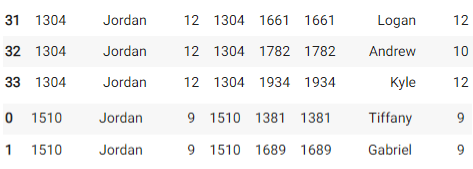

In [ ]:
sql226 = '''
    select *
    from high
    where high.id not in (
                   select f.ID1
                   from friend f
                   left join high H1 ON f.ID1 = H1.ID
                   left join high H2 ON f.ID2 = H2.ID
                   where H1.grade <> H2.grade)
                                                                                     
                
                     '''

pd.read_sql(sql226,conn)

,ID,name,grade
0,1510,Jordan,9
1,1101,Haley,10
2,1468,Kris,10
3,1641,Brittany,10
4,1911,Gabriel,11
5,1025,John,12
6,1661,Logan,12


7.For each student A who likes a student B where the two are not friends, find if they have a friend C in common (who can introduce them!). For all such trios, return the name and grade of A, B, and C.

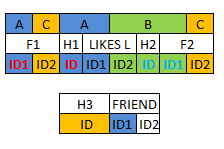

In [ ]:
sql227 = '''
  
       select H1.name, H1.grade, H2.name, H2.grade, H3.name, H3.grade
       from high H1, high H2, high H3, likes L, friend F1, friend F2
       where (H1.ID = L.ID1 AND H2.ID = L.ID2) AND H2.ID 
            NOT IN (
                    select ID2
                    from friend
                    where ID1 = H1.ID
                   ) 
            AND (H1.ID = F1.ID1 AND H3.ID = F1.ID2) AND (H2.ID = F2.ID1 AND H3.ID = F2.ID2)
                                                                                           
        '''

pd.read_sql(sql227,conn)

,name,grade,name,grade,name,grade
0,Andrew,10,Cassandra,9,Gabriel,9
1,Austin,11,Jordan,12,Andrew,10
2,Austin,11,Jordan,12,Kyle,12


8.Find the difference between the number of students in the school and the number of different first names.

In [ ]:
sql228 = '''
    select (count (name) - count (distinct name)) as difference
    from high
                                                                              
       '''

pd.read_sql(sql228,conn)

,difference
0,2


9. Find the name and grade of all students who are liked by more than one other student.

In [ ]:
sql229 = '''
    select name, grade, count (ID) AS count
    from high
    left join likes on high.ID = likes. ID2
    group by ID2
    having count (ID2) > 1                                                                          
       '''

pd.read_sql(sql229,conn)

,name,grade,count
0,Kris,10,2
1,Cassandra,9,2


10.For every situation where student A likes student B, but student B likes a different student C, return the names and grades of A, B, and C.


In [ ]:
sql230 = '''  select H1.name, H1.grade, H2.name, H2.grade, H3.name, H3.grade
              from high H1, high H2, high H3, likes L1, likes L2
              where H1.ID = L1.ID1 AND H2.ID = L1.ID2 
              AND (H2.ID = L2.ID1 AND H3.ID = L2.ID2 AND H3.ID <> H1.ID);
                                                                            
       '''

pd.read_sql(sql230,conn)

,name,grade,name,grade,name,grade
0,Andrew,10,Cassandra,9,Gabriel,9
1,Gabriel,11,Alexis,11,Kris,10


11. Find those students for whom all of their friends are in different grades from themselves. Return the students' names and grades.

In [ ]:
sql231 = ''' select *
             from high H1
             where grade NOT IN (
                                select H2.grade
                                from friend
                                join high H2
                                on H1.ID = friend.ID1 AND H2.ID = friend.ID2
                                where H1.grade = H2.grade)
       
                                                                            
       '''

pd.read_sql(sql231,conn)

,ID,name,grade
0,1316,Austin,11


12.What is the average number of friends per student? (Your result should be just one number.)

In [ ]:
sql232 = ''' select avg(count)
            from
                (select *, count(ID2) as count
                from high H1
                join friend
                on H1.ID = friend.ID1
                group by ID1)                                                            
       '''

pd.read_sql(sql232,conn)

,avg(count)
0,2.5


13.Find the number of students who are either friends with Cassandra or are friends of friends of Cassandra. Do not count Cassandra, even though technically she is a friend of a friend.

In [61]:
sql233 =  ''' select count(distinct f1.ID1) as COUNT
              from friend F1, friend as F2, (select ID from high where name = 'Cassandra') as CASS
              where F1.ID2 = CASS.ID or (F1.ID1 <> CASS.ID and F1.ID2 = F2.ID1 and F2.ID2 = CASS.ID)
       '''
pd.read_sql(sql233,conn)

,COUNT
0,7


14.Find the name and grade of the student(s) with the greatest number of friends.

In [ ]:
sql234 = '''select *, count(ID2) 
            from high   
            join friend
            on high.ID = friend.ID1
            group  by ID1
            having  count(ID2) =  
                                (
                                select  max(count) as max from (
                                                            select *, count(ID2) as count
                                                            from high H1
                                                            join friend
                                                            on H1.ID = friend.ID1
                                                            group by ID1
                                                              ) 
                                 ) 
                                                                        
       '''

pd.read_sql(sql234,conn)

,ID,name,grade,ID1,ID2,count(ID2)
0,1247,Alexis,11,1247,1911,4
1,1782,Andrew,10,1782,1689,4


15.It's time for the seniors to graduate. Remove all 12th graders from Highschooler.

In [ ]:
sql235= '''
   delete from high
   where grade = 12;
 '''
pd.read_sql(sql235,conn)

In [ ]:
sql235= '''
          select *
          from high
          order BY ID;
 '''
pd.read_sql(sql235,conn)

16.If two students A and B are friends, and A likes B but not vice-versa, remove the Likes tuple.

In [ ]:
sql236= '''
  
   DELETE from likes 
   where ID2 IN (
                select ID2
                from friend
                where friend.ID1 = likes.ID1
                                         ) AND ID2 NOT IN (
                                                             select L2.ID1
                                                             from likes L2
                                                             where L2.ID2 = likes.ID1
);
             
               
 '''
pd.read_sql(sql236,conn)

In [33]:

sql236= '''
            select H1.name,
            H1.grade,
            H2.name,
            H2.grade
            from likes L2, High H1, High H2
            where L2.ID1 = H1.ID and L2.ID2 = H2.ID
            order BY H1.name, H1.grade;

 '''
pd.read_sql(sql236,conn)

,name,grade,name,grade
0,Alexis,11,Kris,10
1,Andrew,10,Cassandra,9
2,Austin,11,Jordan,12
3,Cassandra,9,Gabriel,9
4,Gabriel,9,Cassandra,9
5,Jessica,11,Kyle,12
6,John,12,Haley,10
7,Kyle,12,Jessica,11


17.For all cases where A is friends with B, and B is friends with C, add a new friendship for the pair A and C. Do not add duplicate friendships, friendships that already exist, or friendships with oneself. (This one is a bit challenging; congratulations if you get it right.)

In [ ]:
sql237= '''
            insert into friend
            select distinct F1.ID1, F2.ID2
            from friend F1, friend F2
            where F1.ID2 = F2.ID1 AND F1.ID1 <> F2.ID2 AND F1.ID1 NOT IN (
                                                                          select F3.ID1
                                                                          from friend F3
                                                                          where F3.ID2 = F2.ID2
);    

 '''
pd.read_sql(sql237,conn)

In [ ]:
sql237= ''' SELECT ID, name, grade, (SELECT count (*) FROM friend WHERE friend.ID1 = High.ID) AS count
            from high
            order by ID
       ;    

 '''
pd.read_sql(sql237,conn)